In [1]:
import tensorflow as tf 
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = './train'
validation_dir = './validation'
batch_size = 32
img_height = 224
img_width = 224
target_size = (224, 224)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [3]:
train_ds = datagen.flow_from_directory(
  train_dir,
  class_mode='categorical',
  batch_size=batch_size
  )

Found 3057 files belonging to 16 classes.
Using 2446 files for training.


2023-02-27 10:17:29.516306: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = datagen.flow_from_directory(
  validation_dir,
  class_mode='categorical',
  batch_size=batch_size
  )

Found 758 files belonging to 16 classes.
Using 151 files for validation.


In [9]:
cropnet = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


feature_extractor_layer = hub.KerasLayer(
    cropnet,
    input_shape=(224, 224, 3),
    trainable=False 
    )

In [10]:

classifier = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='softmax')
])


In [11]:
classifier.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = classifier.fit_generator(
    train_ds,
    epochs = 15,
    steps_per_epoch = 5,
    validation_data = val_ds,
    validation_steps = 5
)

Epoch 1/15
5/5 [==============================] - 5s 1s/step - loss: 2.3117 - accuracy: 0.2750 - val_loss: 2.3772 - val_accuracy: 0.2119
Epoch 2/15
5/5 [==============================] - 4s 999ms/step - loss: 2.2929 - accuracy: 0.2750 - val_loss: 2.3653 - val_accuracy: 0.2053
Epoch 3/15
5/5 [==============================] - 5s 1s/step - loss: 2.2618 - accuracy: 0.3000 - val_loss: 2.3694 - val_accuracy: 0.1656
Epoch 4/15
5/5 [==============================] - 5s 1s/step - loss: 2.2904 - accuracy: 0.2000 - val_loss: 2.3612 - val_accuracy: 0.2318
Epoch 5/15
5/5 [==============================] - 5s 1s/step - loss: 2.1528 - accuracy: 0.3000 - val_loss: 2.3831 - val_accuracy: 0.2252
Epoch 6/15
5/5 [==============================] - 5s 1s/step - loss: 2.1211 - accuracy: 0.2937 - val_loss: 2.3766 - val_accuracy: 0.2450
Epoch 7/15
5/5 [==============================] - 4s 990ms/step - loss: 2.2517 - accuracy: 0.2375 - val_loss: 2.3621 - val_accuracy: 0.2384
Epoch 8/15
5/5 [===================

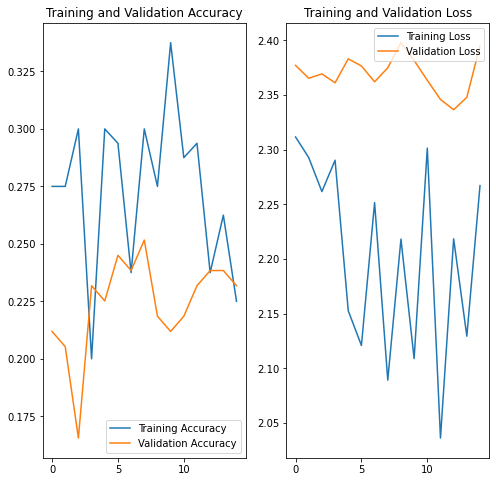

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()